<a href="https://colab.research.google.com/github/AmanYadavKHD/DeepLearning/blob/main/VID49CatsVsDogsClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


Now we upload dataset from kaggle using API commands.

In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
100% 1.06G/1.06G [00:49<00:00, 24.1MB/s]
100% 1.06G/1.06G [00:49<00:00, 22.9MB/s]


Now we will unzip the dataset folder.



In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [4]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten


Now as our dataset is veery big,we will use the concept of generators to divide the dataset into batches and load a small batch in ram at a time.

In [5]:
#generators
train_ds = keras.utils.image_dataset_from_directory(
    directory='/content/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)  #this is used because we have different size images in our dataset.
)

Found 20000 files belonging to 2 classes.


In [6]:
validation_ds = keras.utils.image_dataset_from_directory(
    directory='/content/test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)  #this is used because we have different size images in our dataset.
)

Found 5000 files belonging to 2 classes.


Now as the data of image is stored as numpy arrays,from 0 to 255 pixels, thus we need to normalize the data.

In [7]:
#Normailze
def process(image,label):
  image = tf.cast(image/255.,tf.float32)
  return image,label

train_ds=train_ds.map(process)
validation_ds=validation_ds.map(process)
#map function takes out a image and its label and send it in the process function.


Now our dataset is ready and we have all values from 0 to 1 pixels.

In [8]:
#Creating CNN Layers
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))


In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 128)       0

In [10]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])


In [13]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 90s 143ms/step - loss: 0.5000 - accuracy: 0.7561 - val_loss: 0.4602 - val_accuracy: 0.7904
Epoch 2/10
625/625 [==============================] - 73s 117ms/step - loss: 0.3745 - accuracy: 0.8316 - val_loss: 0.4459 - val_accuracy: 0.8032
Epoch 3/10
625/625 [==============================] - 68s 108ms/step - loss: 0.2248 - accuracy: 0.9057 - val_loss: 0.6334 - val_accuracy: 0.7664
Epoch 4/10
625/625 [==============================] - 60s 96ms/step - loss: 0.1232 - accuracy: 0.9538 - val_loss: 0.8206 - val_accuracy: 0.7668
Epoch 5/10
625/625 [==============================] - 54s 85ms/step - loss: 0.0872 - accuracy: 0.9688 - val_loss: 1.0226 - val_accuracy: 0.7752
Epoch 6/10
625/625 [==============================] - 58s 92ms/step - loss: 0.0640 - accuracy: 0.9806 - val_loss: 1.1718 - val_accuracy: 0.7774
Epoch 7/10
625/625 [==============================] - 58s 91ms/step - loss: 0.0468 - accuracy: 0.9851 - val_loss: 1.2893 - val_accura

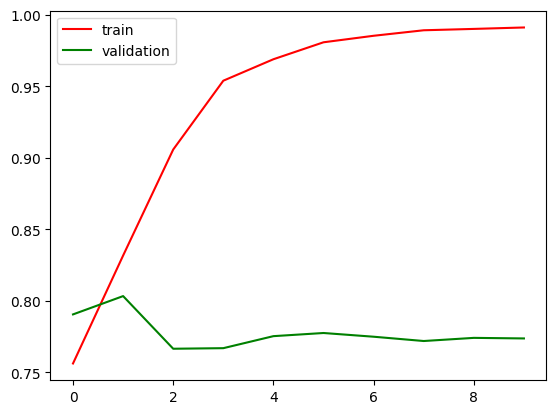

In [14]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='green',label='validation')
plt.legend()
plt.show()


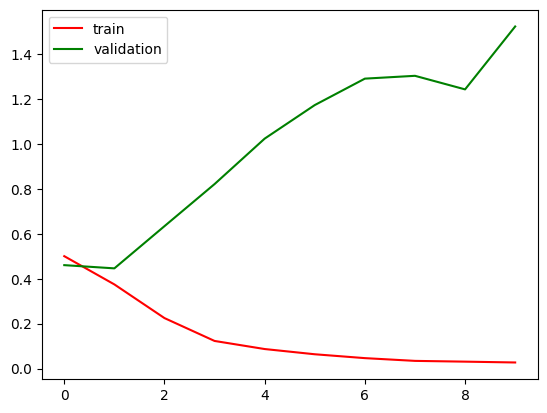

In [15]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='green',label='validation')
plt.legend()
plt.show()

In [16]:
#Ways to reduce overfitting.

#Add more data
#Data Augmentation
#L1/L2 Regularizer
#Dropouts
#model.add(Dropout(0.1))
#Batch Norm
#model.add(BatchNormailzation())
#Reduce Complexity


Now we will test our model on any picture of dog or cat using openCV

TypeError: Image data of dtype object cannot be converted to float

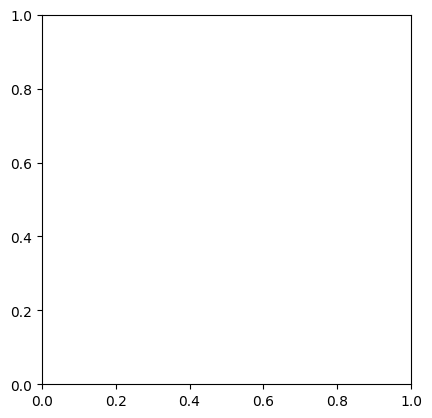

In [20]:
import cv2
test_img = cv2.imread('/content/testdog.jpg')
plt.imshow(test_img)
test_img=cv2.resize(test_img,(256,256))
#Now we will convert it in a 4d tensor batch of single image.
test_input = test_img.reshape((1,256,256,3))
model.predict(test_input)